In [1]:
# %% Import libraries
import os
import yt
import numpy as np
import matplotlib.pyplot as plt

# %% Set parameters and file information
# Update these paths and parameters as needed
file_prefix = 'sn34_smd132_bx5_pe300_hdf5_plt_cnt_'
timestamp = 420
hdf5_root = '/srv/data/stratbox_simulations/stratbox_particle_runs/bx5/smd132/sn34/pe300/4pc_resume/4pc'  # Change to your HDF5 files directory
filename = f"{file_prefix}0{timestamp}"

# %% Load the dataset using yt
file_path = os.path.join(hdf5_root, filename)
print("Loading dataset from:", file_path)
ds = yt.load(file_path)

# %% Define grid parameters and create the arbitrary grid
# Define the center (in pc) and set grid boundaries from -500 to 500 pc.
center = [0, 0, 0]  # in pc
arb_center = ds.arr(center, 'code_length')
left_edge = arb_center + ds.quan(-500, 'pc')
right_edge = arb_center + ds.quan(500, 'pc')

# Set dimensions for the arbitrary grid
xlim = 256  # number of cells in x-direction
ylim = 256  # number of cells in y-direction
zlim = 256  # number of cells in z-direction

obj = ds.arbitrary_grid(left_edge, right_edge, dims=(xlim, ylim, zlim))
x_range = (0, xlim)
y_range = (0, ylim)
z_range = (0, zlim)

# %% Extract the temperature cube and convert it to Kelvin
temp_cube = obj["flash", "temp"][x_range[0]:x_range[1],
                                 y_range[0]:y_range[1],
                                 z_range[0]:z_range[1]].to('K').value


yt : [INFO     ] 2025-03-21 14:01:53,509 Particle file found: sn34_smd132_bx5_pe300_hdf5_part_0420
yt : [INFO     ] 2025-03-21 14:01:53,577 Parameters: current_time              = 6721863310591746.0
yt : [INFO     ] 2025-03-21 14:01:53,578 Parameters: domain_dimensions         = [  32   32 1280]
yt : [INFO     ] 2025-03-21 14:01:53,579 Parameters: domain_left_edge          = [-1.54283879e+21 -1.54283879e+21 -6.17135516e+22]
yt : [INFO     ] 2025-03-21 14:01:53,580 Parameters: domain_right_edge         = [1.54283879e+21 1.54283879e+21 6.17135516e+22]
yt : [INFO     ] 2025-03-21 14:01:53,581 Parameters: cosmological_simulation   = 0


Loading dataset from: /srv/data/stratbox_simulations/stratbox_particle_runs/bx5/smd132/sn34/pe300/4pc_resume/4pc/sn34_smd132_bx5_pe300_hdf5_plt_cnt_0420


In [2]:
# %% Step 2: Extract the x-y plane at z = 180
temp_z180 = temp_cube[:, :, 180]

# %% Step 3: Extract the line at y = 200 (varying x)
temp_y200 = temp_z180[:, 200]

# %% Step 4: Calculate the normalized line
# Apply logarithm (base 10) and normalize the resulting values to a scale of 0 to 255.
y_line_logged = np.log10(temp_y200)
normalized_line = ((y_line_logged - np.min(y_line_logged)) /
                   (np.max(y_line_logged) - np.min(y_line_logged))) * 255

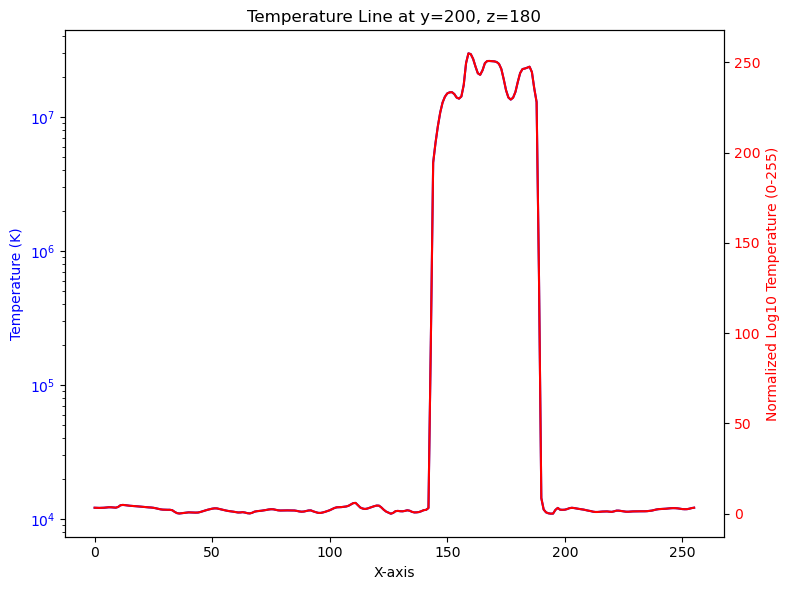

In [3]:
# %% Step 5: Plot the original and normalized temperature lines on dual y-axes
fig, ax1 = plt.subplots(figsize=(8, 6))
x_vals = np.arange(len(temp_y200))

# Plot original temperature (left y-axis)
ax1.plot(x_vals, temp_y200, 'b-', label="Original Temperature")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Temperature (K)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_yscale('log')

# Create a twin axis for the normalized, logged temperature (right y-axis)
ax2 = ax1.twinx()
ax2.plot(x_vals, normalized_line, 'r-', label="Normalized, Logged Temperature")
ax2.set_ylabel("Normalized Log10 Temperature (0-255)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Temperature Line at y=200, z=180")
fig.tight_layout()
plt.show()

In [4]:
def count_above_threshold(matrix, threshold):
    """
    Counts the number of elements in a 2D matrix that are greater than the given threshold.

    Parameters:
    - matrix (list of lists or np.ndarray): 2D matrix to evaluate
    - threshold (float or int): Threshold value

    Returns:
    - int: Number of elements greater than the threshold
    """
    matrix = np.array(matrix)
    return np.sum(matrix > threshold)


In [7]:
count = count_above_threshold(temp_y200, 316227)
print(f"Number of elements above 316227: {count}")

count_125 = count_above_threshold(normalized_line, 125)
print(f"Number of elements above 125: {count_125}")

Number of elements above 316227: 46
Number of elements above 125: 45
